# How COVID-19 affects Canadian's life?
### How is this reflected by electricity demand changes in Ontario? 

In this project, electricity demand datasets were downloaded from the website of Independent Electricity System Operator (IESO): 

* http://www.ieso.ca/Power-Data/Data-Directory
* http://reports.ieso.ca/public/Demand/

 This data is for Ontario, Canada <br>
 Electricity demand

In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [536]:
# Loading electricity demand data for years 2016-2020
energy_2016 = pd.read_csv('quiz_data/PUB_Demand_2016.csv',skiprows=3)
energy_2017 = pd.read_csv('quiz_data/PUB_Demand_2017.csv',skiprows=3)
energy_2018 = pd.read_csv('quiz_data/PUB_Demand_2018.csv',skiprows=3)
energy_2019 = pd.read_csv('quiz_data/PUB_Demand_2019.csv',skiprows=3)
energy_2020 = pd.read_csv('quiz_data/PUB_Demand_2020.csv',skiprows=3)

In [537]:
energy_2019.head()

,Date,Hour,Market Demand,Ontario Demand
0,2019-01-01,1,16231,13198
1,2019-01-01,2,16051,12737
2,2019-01-01,3,15805,12531
3,2019-01-01,4,15580,12291
4,2019-01-01,5,15609,12305


In [538]:
# Compute mean and standard deviation 
# for different hours during a day for years 2016-2020 
day_2016 = energy_2016.groupby(['Hour']).agg({'Ontario Demand': [np.mean, np.std]})
day_2017 = energy_2017.groupby(['Hour']).agg({'Ontario Demand': [np.mean, np.std]})
day_2018 = energy_2018.groupby(['Hour']).agg({'Ontario Demand': [np.mean, np.std]})
day_2019 = energy_2019.groupby(['Hour']).agg({'Ontario Demand': [np.mean, np.std]})
day_2020 = energy_2020.groupby(['Hour']).agg({'Ontario Demand': [np.mean, np.std]})

mean_2016D = day_2016['Ontario Demand','mean']
std_2016D = day_2016['Ontario Demand','std']
mean_2017D = day_2017['Ontario Demand','mean']
std_2017D = day_2017['Ontario Demand','std']
mean_2018D = day_2018['Ontario Demand','mean']
std_2018D = day_2018['Ontario Demand','std']
mean_2019D = day_2019['Ontario Demand','mean']
std_2019D = day_2019['Ontario Demand','std']
mean_2020D = day_2020['Ontario Demand','mean']
std_2020D = day_2020['Ontario Demand','std']

In [539]:
type(mean_2020)

pandas.core.series.Series

In [540]:
day_x_axis = day_2019.index.tolist()
print day_x_axis

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


<IPython.core.display.Javascript object>


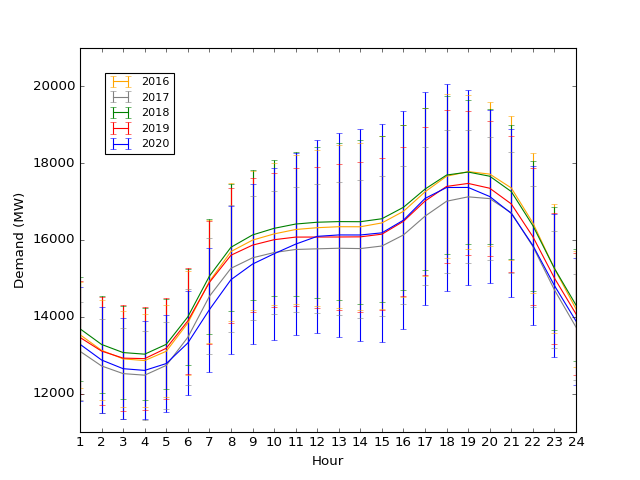

In [541]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_xticks(day_x_axis)

mean_2016D.plot(yerr=std_2016D,c='orange',label='2016')
mean_2017D.plot(yerr=std_2017D,c='grey',label='2017')
mean_2018D.plot(yerr=std_2018D,c='green',label='2018')
mean_2019D.plot(yerr=std_2019D,c='red',label='2019')
mean_2020D.plot(yerr=std_2020D,c='blue',style='^',label='2020')

ax1.legend(bbox_to_anchor=(0.0, 0.0, 0.2, 0.95),fontsize=10)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Demand (MW)')

plt.savefig('figure_01.png')

We first analyzed the change of electricity demand in a day for years 2016-2020. The demand change is averaged over all 365 days for a given year. For this plot, the differences between hourly demand patterns of different years are not obvious. However, in this plot, demands for years 2016-2019 are averaged over all 12 months and demand for year 2020 is averaged over 9 months, and here we ignore differences between electricity demands of months. It would be more meaningful to break down the datasets into different quarters/seasons or different months.     

In [542]:
# make copies of dataframes
energy_2016_copy = energy_2016.copy()
energy_2017_copy = energy_2017.copy()
energy_2018_copy = energy_2018.copy()
energy_2019_copy = energy_2019.copy()
energy_2020_copy = energy_2020.copy()

# change datetime format from YYYY-MM-DD to MM
energy_2016_copy['Date'] = pd.to_datetime(energy_2016_copy['Date']).apply(lambda x : x.strftime('%m'))
energy_2017_copy['Date'] = pd.to_datetime(energy_2017_copy['Date']).apply(lambda x : x.strftime('%m'))
energy_2018_copy['Date'] = pd.to_datetime(energy_2018_copy['Date']).apply(lambda x : x.strftime('%m'))
energy_2019_copy['Date'] = pd.to_datetime(energy_2019_copy['Date']).apply(lambda x : x.strftime('%m'))
energy_2020_copy['Date'] = pd.to_datetime(energy_2020_copy['Date']).apply(lambda x : x.strftime('%m'))

In [543]:
# compute averaged electricity demand for each month of years 2016 - 2020
month_2016 = energy_2016_copy.groupby(['Date']).agg({'Ontario Demand': [np.mean, np.std]})
month_2017 = energy_2017_copy.groupby(['Date']).agg({'Ontario Demand': [np.mean, np.std]})
month_2018 = energy_2018_copy.groupby(['Date']).agg({'Ontario Demand': [np.mean, np.std]})
month_2019 = energy_2019_copy.groupby(['Date']).agg({'Ontario Demand': [np.mean, np.std]})
month_2020 = energy_2020_copy.groupby(['Date']).agg({'Ontario Demand': [np.mean, np.std]})

mean_2016M = month_2016['Ontario Demand','mean'].tolist()
std_2016M = month_2016['Ontario Demand','std'].tolist()
mean_2017M = month_2017['Ontario Demand','mean'].tolist()
std_2017M = month_2017['Ontario Demand','std'].tolist()
mean_2018M = month_2018['Ontario Demand','mean'].tolist()
std_2018M = month_2018['Ontario Demand','std'].tolist()
mean_2019M = month_2019['Ontario Demand','mean'].tolist()
std_2019M = month_2019['Ontario Demand','std'].tolist()
mean_2020M = month_2020['Ontario Demand','mean'].tolist()
std_2020M = month_2020['Ontario Demand','std'].tolist()
month_x_axis = month_2019.index.tolist()

In [544]:
x_index=range(len(month_x_axis))
x_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

<IPython.core.display.Javascript object>


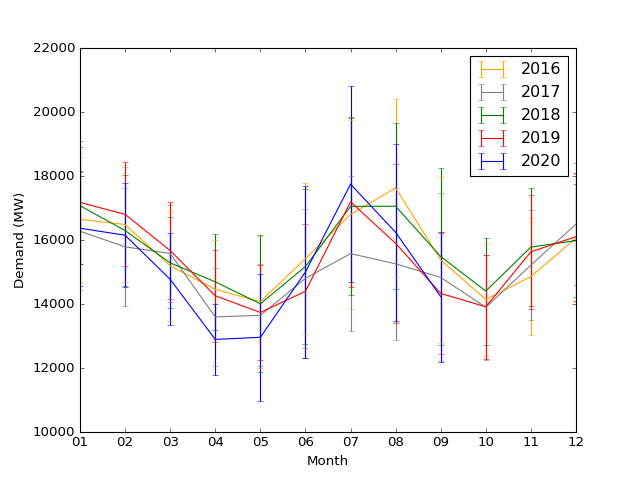

In [546]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_xlim(0,11)
ax1.set_xticks(range(12))
ax1.set_xticklabels(month_x_axis)


# orange, grey, green, red, blue
ax1.errorbar(range(len(mean_2016M)),mean_2016M,yerr=std_2016M,color='orange',label='2016')
ax1.errorbar(range(len(mean_2017M)),mean_2017M,yerr=std_2017M,color='grey', label='2017')
ax1.errorbar(range(len(mean_2018M)),mean_2018M,yerr=std_2018M,color='green',label='2018')
ax1.errorbar(range(len(mean_2019M)),mean_2019M,yerr=std_2019M,color='red',  label='2019')
ax1.errorbar(range(len(mean_2020M)),mean_2020M,yerr=std_2020M,color='blue', label='2020')

ax1.legend()

ax1.set_xlabel('Month')
ax1.set_ylabel('Demand (MW)')
plt.savefig('figure_02.png')

This plot shows monthly electricity demands for years 2016-2020. The large change in demand between March and July is quite interesting, which can be due to the lockdown and reopen of the province. The demands in March and April of 2020 are the lowest, compared to the same periods of other years. This might be due to the lockdown in Ontario initiated in early March in a response to the COVID-19 pandemic. However, when the province reopened in June, the electricity demand started to climb up and reached the peak in July. The demand in July of 2020 is the highest, compared to the same month of other years.  

<IPython.core.display.Javascript object>


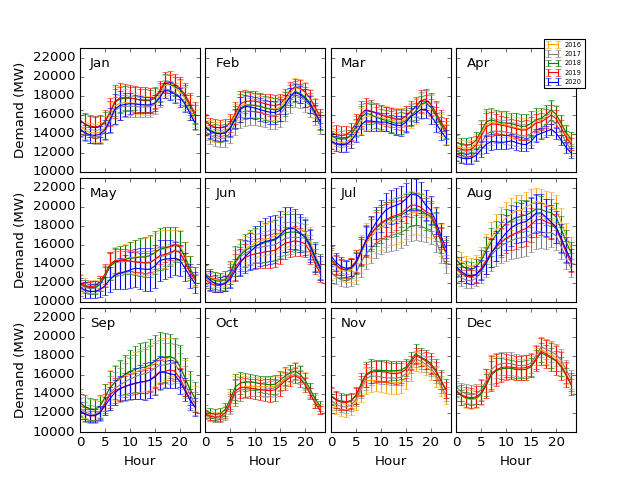

In [548]:
energy_2016 = pd.read_csv('quiz_data/PUB_Demand_2016.csv',skiprows=3)
energy_2017 = pd.read_csv('quiz_data/PUB_Demand_2017.csv',skiprows=3)
energy_2018 = pd.read_csv('quiz_data/PUB_Demand_2018.csv',skiprows=3)
energy_2019 = pd.read_csv('quiz_data/PUB_Demand_2019.csv',skiprows=3)
energy_2020 = pd.read_csv('quiz_data/PUB_Demand_2020.csv',skiprows=3)

energy_2016['Date'] = pd.to_datetime(energy_2016['Date']).apply(lambda x : x.strftime('%m'))
energy_2017['Date'] = pd.to_datetime(energy_2017['Date']).apply(lambda x : x.strftime('%m'))
energy_2018['Date'] = pd.to_datetime(energy_2018['Date']).apply(lambda x : x.strftime('%m'))
energy_2019['Date'] = pd.to_datetime(energy_2019['Date']).apply(lambda x : x.strftime('%m'))
energy_2020['Date'] = pd.to_datetime(energy_2020['Date']).apply(lambda x : x.strftime('%m'))

energy_2016 = energy_2016.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})
energy_2017 = energy_2017.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})
energy_2018 = energy_2018.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})
energy_2019 = energy_2019.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})
energy_2020 = energy_2020.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3,4,
                                                                               sharex=True, 
                                                                               sharey=True)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

ndx_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# orange, grey, green, red, blue
for ax, ndx, mnh in zip(axes, ndx_list,month_list):
    
    mean_2016D = energy_2016.loc[ndx,]['Ontario Demand','mean'].tolist()
    std_2016D = energy_2016.loc[ndx,]['Ontario Demand','std'].tolist()
    ax.errorbar(range(len(mean_2016D)),mean_2016D,yerr=std_2016D,color='orange', label='2016')
    
    mean_2017D = energy_2017.loc[ndx,]['Ontario Demand','mean'].tolist()
    std_2017D = energy_2017.loc[ndx,]['Ontario Demand','std'].tolist()
    ax.errorbar(range(len(mean_2017D)),mean_2017D,yerr=std_2017D,color='grey', label='2017')

    mean_2018D = energy_2018.loc[ndx,]['Ontario Demand','mean'].tolist()
    std_2018D = energy_2018.loc[ndx,]['Ontario Demand','std'].tolist()
    ax.errorbar(range(len(mean_2018D)),mean_2018D,yerr=std_2018D,color='green', label='2018')
    
    mean_2019D = energy_2019.loc[ndx,]['Ontario Demand','mean'].tolist()
    std_2019D = energy_2019.loc[ndx,]['Ontario Demand','std'].tolist()
    ax.errorbar(range(len(mean_2019D)),mean_2019D,yerr=std_2019D,color='red', label='2019')
    
    
    if int(ndx) <= 9:
        mean_2020D = energy_2020.loc[ndx,]['Ontario Demand','mean'].tolist()
        std_2020D = energy_2020.loc[ndx,]['Ontario Demand','std'].tolist()
        ax.errorbar(range(len(mean_2020D)),mean_2020D,yerr=std_2020D,color='blue', label='2020')
    
    ax.set_xlim(0,24)
    ax.set_ylim(10000,23000)
    ax.text(2, 21000, mnh)
    if int(ndx) == 4:
        ax.legend(bbox_to_anchor=(0.3, 0.3, 0.8, 0.8),fontsize=6)

    if int(ndx) in [1,5,9]:
        ax.set_ylabel('Demand (MW)')
        
    ax.set_xlabel('Hour')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('figure_03.png')


This plot shows the averaged hourly electricity demands during a day in different months for years 2016-2020. If we consider standard deviations, the differences between the trends of different years are not very obvious. However, the overall electricity demand in July of 2020 appears to be the highest compared to the same period of other years and to all the other months. The overall demand in April and May of 2020 appear to be the lowest compared to all the other periods. 

<IPython.core.display.Javascript object>


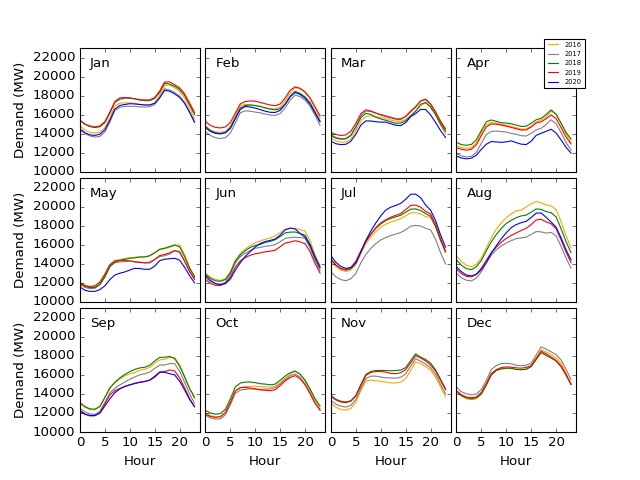

In [532]:
energy_2016 = pd.read_csv('quiz_data/PUB_Demand_2016.csv',skiprows=3)
energy_2017 = pd.read_csv('quiz_data/PUB_Demand_2017.csv',skiprows=3)
energy_2018 = pd.read_csv('quiz_data/PUB_Demand_2018.csv',skiprows=3)
energy_2019 = pd.read_csv('quiz_data/PUB_Demand_2019.csv',skiprows=3)
energy_2020 = pd.read_csv('quiz_data/PUB_Demand_2020.csv',skiprows=3)

energy_2016['Date'] = pd.to_datetime(energy_2016['Date']).apply(lambda x : x.strftime('%m'))
energy_2017['Date'] = pd.to_datetime(energy_2017['Date']).apply(lambda x : x.strftime('%m'))
energy_2018['Date'] = pd.to_datetime(energy_2018['Date']).apply(lambda x : x.strftime('%m'))
energy_2019['Date'] = pd.to_datetime(energy_2019['Date']).apply(lambda x : x.strftime('%m'))
energy_2020['Date'] = pd.to_datetime(energy_2020['Date']).apply(lambda x : x.strftime('%m'))

energy_2016 = energy_2016.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})
energy_2017 = energy_2017.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})
energy_2018 = energy_2018.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})
energy_2019 = energy_2019.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})
energy_2020 = energy_2020.groupby(['Date','Hour']).agg({'Ontario Demand': [np.mean, np.std]})

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3,4,
                                                                               sharex=True, 
                                                                               sharey=True)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

ndx_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# orange, grey, green, red, blue
for ax, ndx, mnh in zip(axes, ndx_list,month_list):
    
    mean_2016D = energy_2016.loc[ndx,]['Ontario Demand','mean'].tolist()
    #std_2016D = energy_2016.loc[ndx,]['Ontario Demand','std'].tolist()
    ax.errorbar(range(len(mean_2016D)),mean_2016D,color='orange', label='2016')
    
    mean_2017D = energy_2017.loc[ndx,]['Ontario Demand','mean'].tolist()
    #std_2017D = energy_2017.loc[ndx,]['Ontario Demand','std'].tolist()
    ax.errorbar(range(len(mean_2017D)),mean_2017D,color='grey', label='2017')

    mean_2018D = energy_2018.loc[ndx,]['Ontario Demand','mean'].tolist()
    #std_2018D = energy_2018.loc[ndx,]['Ontario Demand','std'].tolist()
    ax.errorbar(range(len(mean_2018D)),mean_2018D,color='green', label='2018')
    
    mean_2019D = energy_2019.loc[ndx,]['Ontario Demand','mean'].tolist()
    #std_2019D = energy_2019.loc[ndx,]['Ontario Demand','std'].tolist()
    ax.errorbar(range(len(mean_2019D)),mean_2019D,color='red', label='2019')
    
    
    if int(ndx) <= 9:
        mean_2020D = energy_2020.loc[ndx,]['Ontario Demand','mean'].tolist()
        #std_2020D = energy_2020.loc[ndx,]['Ontario Demand','std'].tolist()
        ax.errorbar(range(len(mean_2020D)),mean_2020D,color='blue', label='2020')
    
    ax.set_xlim(0,24)
    ax.set_ylim(10000,23000)
    ax.text(2, 21000, mnh)
    if int(ndx) == 4:
        ax.legend(bbox_to_anchor=(0.3, 0.3, 0.8, 0.8),fontsize=6)

    ax.set_xlabel('Hour')
    if int(ndx) in [1,5,9]:
        ax.set_ylabel('Demand (MW)')
    
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('figure_03-2.png')


Here we plotted the same plot, but without standard deviations. Here, we're trying to compare the trends of hourly demand during a day in different months between years 2016-2020. It is actually difficult to tell the differences between different years. It's interesting to note one figure posted on the IESO website ( http://www.ieso.ca/Sector-Participants/IESO-News/2020/04/Electricity-demand-in-residential-homes-during-COVID-19). The writer claimed that there is an obvious change in people home routines after lockdown by comparing the demands of the March of years 2019 and 2020. However, the writer only picked one specific day of 2019, March 21, and compared the demand of this day to another specific day of 2020, March 31. This is against Cario's principles of truthfulness and insightfulness. Our plot shows that the differences in daily trends between different years are not obvious. 